<a href="https://colab.research.google.com/github/Mshahnawaz1/Currency-Exchange/blob/main/docs/tutorials/0_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Your First Model

### The Boltzmann Wealth Model

**Important:**
- If you are just exploring Mesa and want the fastest way to execute the code we recommend executing this tutorial online in a Colab notebook. [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mesa/mesa/blob/main/docs/tutorials/0_first_model.ipynb) or if you do not have a Google account you can use [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/mesa/mesa/main?labpath=docs%2Ftutorials%2F0_first_model.ipynb) (This can take 30 seconds to 5 minutes to load)
- If you are running locally, please ensure you have the latest Mesa version installed.

## Tutorial Description

[Mesa](https://github.com/mesa/mesa) is a Python framework for [agent-based modeling](https://en.wikipedia.org/wiki/Agent-based_model). This tutorial is the first in a series of introductory tutorials that will assist you in getting started and discover some of the core features of Mesa.  The tutorial starts with the key pieces of a model and then progressively adds functionality.

Should anyone find any errors, bugs, have a suggestion, or just are looking for clarification, let us know in our [chat](https://matrix.to/#/#project-mesa:matrix.org)!

The premise of this tutorial is to create a starter-level model representing agents exchanging money.

## Model Description

This is a simulated agent-based economy. In an agent-based economy, the behavior of an individual economic agent, such as a consumer or producer, is studied in a market environment.
This model is drawn from the field econophysics, specifically a paper prepared by Drăgulescu et al. for additional information on the modeling assumptions used in this model. [Drăgulescu, 2002].

The assumption that govern this model are:

1. There are some number of agents.
2. All agents begin with 1 unit of money.
3. At every step of the model, an agent gives 1 unit of money (if they
   have it) to some other agent.

Even as a starter-level model it yields results that are both interesting and unexpected.

Due to its simplicity and intriguing results, we found it to be a good starter model.

### Tutorial Setup

Create and activate a [virtual environment](http://docs.python-guide.org/en/latest/dev/virtualenvs/). *Python version 3.12 or higher is required*.

Install Mesa:

```bash
pip install mesa[rec]
```

Install Jupyter notebook (optional):

```bash
pip install jupyter
```

Install [Seaborn](https://seaborn.pydata.org/) (which is used for data visualization):

```bash
pip install seaborn
```

### IN COLAB? - Run the next cell

## Building the Sample Model

After Mesa is installed a model can be built.

 This tutorial is written in [Jupyter](http://jupyter.org) to facilitate the explanation portions.

Start Jupyter form the command line:

```bash
jupyter lab
```

Create a new notebook named `money_model.ipynb` (or whatever you want to call it).

In [9]:
! pip install seaborn jupyter lab mesa[rec]


In [8]:
!pip install mesa[rec]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.7/268.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 41.2 MB/s eta 0:00:00


### Import Dependencies
This includes importing of dependencies needed for the tutorial.

In [10]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

### Create Agent

First create the agent. As the tutorial progresses, more functionality will be added to the agent.

**Background:** Agents are the individual entities that act in the model. Mesa automatically assigns each agent that is created an integer as a `unique_id.`

**Model-specific information:** Agents are the individuals that exchange money, in this case the amount of money an individual agent has is represented as wealth.

**Code implementation:** This is done by creating a new class (or object) that extends `mesa.Agent` creating a subclass of  the `Agent` class from mesa. The new class is named `MoneyAgent`. The inherited code of the Mesa agent object can be found in the [mesa repo](https://github.com/mesa/mesa/blob/main/mesa/agent.py).

The `MoneyAgent` class is created with the following code:

In [11]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

### Create Model

Next, create the model. This gives us the two basic classes of any Mesa ABM - the agent class (population of agent objects that doing something) and the manager class (a model object that manages the creation, activation, datacollection etc of the agents)

**Background:** The model can be visualized as a list containing all the agents. The model creates, holds and manages all the agent objects, specifically in a dictionary. The model activates agents in discrete time steps.

**Model-specific information:** When a model is created the number of agents within the model is specified. The model then creates the agents and places them in a set of agents.

**Code implementation:** This is done by creating a new class (or object) that extends `mesa.Model` and calls `super().__init__()`, creating a subclass of the `Model` class from mesa. The new class is named `MoneyModel`.  The Mesa code you are using can be found in [model module](https://github.com/mesa/mesa/blob/main/mesa/model.py) and the AgentSet in the [agent module](https://github.com/mesa/mesa/blob/d7a3834c99a3be809abe2edc8b83610f3d4438ba/mesa/agent.py#L86). A critical point is that you can use the `seed` kwarg (keyword argument) to set a seed which controls the random number generator of the model class allowing for the reproducibility of results.

The `MoneyModel` class is created with the following code:

In [12]:
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

### Making the Agents `do`

With the basics of the Agent class and Model class created we can now activate the agents to `do` things

**Background:** Mesa's `do` function calls agent functions to grow your ABM. A step is the smallest unit of time in the model, and is often referred to as a tick. The `do` function and Python functionality can be configured to activate agents in different orders. This can be important as the order in which agents are activated can impact the results of the model [Comer2014]. At each step of the model, one or more of the agents -- usually all of them -- are activated and take their own step, changing internally and/or interacting with one another or the environment.

**Model-specific information:** For this section we will randomly reorder the Agent activation order using  `mesa.Agent.shuffle_do` and have the agents `step` function print the agent's unique id that they were assigned during the agent creation process.

**Code implementation:** Using standard ABM convention we add a `step` function to the `MoneyModel` class which calls the `mesa.Agent.shuffle_do` function. We then pass into `shuffle_do` the parameter "step". This tells mesa to look for and execute the `step` function in our MoneyAgent class.  

In [18]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {self.unique_id!s}.")


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("say_hi")

### Running the Model
We now have the pieces of a basic model. The model can be run by creating a model object and calling the step method. The model will run for one step and print the unique_id of each agent. You may run the model for multiple steps by calling the step method multiple times.

Create the model object, and run it for one step:

In [14]:
starter_model = MoneyModel(10)
starter_model.step()

Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 9.


In [15]:
# Run this step a few times and see what happens!
starter_model.step()
# Notice the order of the agents changes each time.

Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 7.


In [ ]:
# Challenge: Change the seed from None to a number like 42 and see the impact

In [17]:
import mesa

# 1. Define the Agent
class RobotAgent(mesa.Agent):
    def __init__(self, model):
        super().__init__(model)

    def step(self):
        # Get list of neighboring cells
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,          # Includes diagonals
            include_center=False # Can't stay in the same spot
        )
        # Pick one at random and move
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

# 2. Define the Model
class CleaningModel(mesa.Model):
    def __init__(self, num_robots, width, height):
        super().__init__()
        self.grid = mesa.space.MultiGrid(width, height, torus=True)

        # Create Agents
        for _ in range(num_robots):
            robot = RobotAgent(self)
            # Add to the model's agent list
            self.agents.add(robot)
            # Place on a random cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(robot, (x, y))

    def step(self):
        # Mesa 2.0+ handles agent activation automatically
        self.agents.shuffle_do("step")

# 3. Run the Model
model = CleaningModel(num_robots=3, width=5, height=5)

print("Starting positions:")
for a in model.agents:
    print(f"Robot {a.unique_id} at {a.pos}")

model.step() # Run one tick

print("\nPositions after 1 step:")
for a in model.agents:
    print(f"Robot {a.unique_id} at {a.pos}")

Starting positions:
Robot 1 at (4, 4)
Robot 2 at (4, 1)
Robot 3 at (2, 2)

Positions after 1 step:
Robot 1 at (4, 3)
Robot 2 at (3, 2)
Robot 3 at (3, 2)


In [ ]:
# Challenge: Change `shuffle_do` to just `do` and see the impact

### Exercise
Modifying the code below to have every agent print out its `wealth` when it is activated.

In [ ]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def say_wealth(self):
        # The agent's step will go here.
        # FIXME: need to print the agent's wealth
        print("Hi, I am an agent and I am broke!")

Create a model for 12 Agents, and run it for a few steps to see the output.

In [ ]:
# Fixme: Create the model object, and run it
class modelObj(mesa.model):
  super.init()


### Agents Exchange

Returning back to the MoneyAgent the actual exchange process is now going to be created.

**Background:** This is where the agent's behavior as it relates to each step or tick of the model is defined.

**Model-specific information:** In this case, the agent will check its wealth, and if it has money, give one unit of it away to another random agent.

**Code implementation:** The agent's step method is called by `mesa.Agent.shuffle_do("exchange")`during each step of the model. To allow the agent to choose another agent at random, we use the `model.random` random-number generator. This works just like Python's `random` module, but if a fixed seed is  set when the model is instantiated (see earlier challenge), this allows users to replicate a specific model run later. Once we identify this other agent object we increase their wealth by 1 and decrease this agents wealth by one.

This updates the step function as shown below:

In [ ]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

### Running your first model

With exchange behavior added, it's time for the first rudimentary run of the model.

Now let's create a model with 10 agents, and run it for 30 steps.

In [21]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(2):  # Runs the model for 30 steps;
    model.step()

# Note: An underscore is common convention for a variable that is not used.

Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 5.


Next, we need to get some data out of the model. Specifically, we want to see the distribution of the agent's wealth.

 We can get the wealth values with list comprehension, and then use seaborn (or another graphics library) to visualize the data in a histogram.

In [ ]:
agent_wealth = [a.wealth for a in model.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="number of agents"
);  # The semicolon is just to avoid printing the object representation

To get a better idea of how a model behaves, we can create multiple model objects and see the distribution that emerges from all of them.

 We can do this with a nested for loop:

Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 7.
Hi, I am 

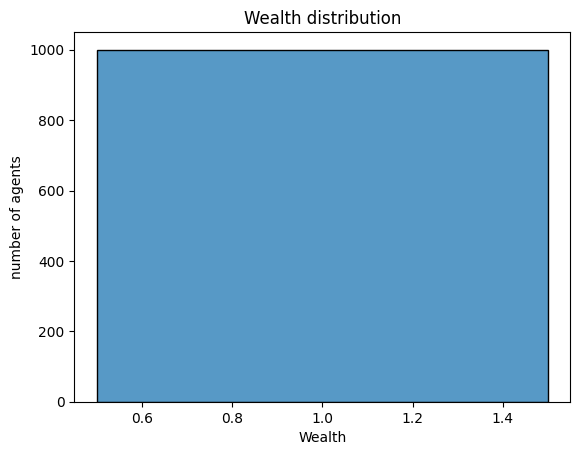

In [19]:
all_wealth = []
# This runs the model 100 times, each model executing 30 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

This runs 100 instantiations of the model, and runs each for 30 steps.

Notice that we set the histogram bins to be integers (`discrete=True`), since agents can only have whole numbers of wealth.

 This distribution looks a lot smoother. By running the model 100 times, we smooth out some of the 'noise' of randomness, and get to the model's overall expected behavior.

This outcome might be surprising. Despite the fact that all agents, on average, give and receive one unit of money every step, the model converges to a state where most agents have a small amount of money and a small number have a lot of money.

### Exercise
Change the above code to see the impact of different model runs, agent populations, and number of steps.

## Next Steps

Check out the [adding space tutorial](https://mesa.readthedocs.io/latest/tutorials/1_adding_space.html) on how to build interactive dashboards for your models.

### More Mesa

If you are looking for other Mesa models or tools here are some additional resources.

- Example ABMs: Find canonical examples and examples of ABMs demonstrating highlighted features in the [Examples Tab](https://mesa.readthedocs.io/stable/examples.html)
- Expanded Examples: Want to integrate Reinforcement Learning or work on the Traveling Salesman Problem? Checkout  [Mesa Examples](https://github.com/mesa/mesa-examples/)
- Mesa-Geo: If you need an ABM with Geographic Information Systems (GIS) checkout [Mesa-Geo](https://mesa-geo.readthedocs.io/latest/)
- Mesa Frames: Have a large complex model that you need to speed up, check out [Mesa Frames](https://github.com/mesa/mesa-frames)

## Happy Modeling!

This document is a work in progress.  If you see any errors, exclusions or have any problems please contact [us](https://github.com/mesa/mesa/issues).

[Comer2014] Comer, Kenneth W. “Who Goes First? An Examination of the Impact of Activation on Outcome Behavior in AgentBased Models.” George Mason University, 2014. http://mars.gmu.edu/bitstream/handle/1920/9070/Comer_gmu_0883E_10539.pdf

[Dragulescu2002] Drăgulescu, Adrian A., and Victor M. Yakovenko. “Statistical Mechanics of Money, Income, and Wealth: A Short Survey.” arXiv Preprint Cond-mat/0211175, 2002. http://arxiv.org/abs/cond-mat/0211175.